In [80]:
import pandas as pd
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

df_mpu6050 = pd.read_csv("../serial-read/dados_mpu6050.csv")


In [81]:

print("Informações do DataFrame")
print(df_mpu6050.info())


Informações do DataFrame
<class 'pandas.DataFrame'>
RangeIndex: 108278 entries, 0 to 108277
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp_us  108276 non-null  float64
 1   ax_g          108278 non-null  float64
 2   ay_g          108278 non-null  float64
 3   az_g          108278 non-null  float64
 4   gx_dps        108278 non-null  float64
 5   gy_dps        108278 non-null  float64
 6   gz_dps        108278 non-null  float64
 7   temp_c        108278 non-null  float64
 8   dropped       108278 non-null  str    
dtypes: float64(8), str(1)
memory usage: 7.4 MB
None


In [82]:
print("Quantidade de linhas:")
print(df_mpu6050.size)

Quantidade de linhas:
974502


In [83]:
print(df_mpu6050.head())

df_mpu6050["az_g"]-=1

print(df_mpu6050.head())

   timestamp_us    ax_g    ay_g    az_g  gx_dps  gy_dps  gz_dps  temp_c  \
0      906853.0 -0.0457 -0.0067  0.9493 -1.6947 -0.0305 -1.1832   26.59   
1      911853.0 -0.0431 -0.0065  0.9576 -1.6412 -0.1145 -1.1679   26.62   
2      916853.0 -0.0427 -0.0145  0.9310 -1.6565 -0.1298 -1.2137   26.62   
3      921853.0 -0.0509 -0.0059  0.9933 -1.6260 -0.0305 -1.2748   26.64   
4      926853.0 -0.0375 -0.0197  0.9917 -1.8626 -0.2137 -1.1679   26.62   

  dropped  
0       0  
1       0  
2       0  
3       0  
4       0  
   timestamp_us    ax_g    ay_g    az_g  gx_dps  gy_dps  gz_dps  temp_c  \
0      906853.0 -0.0457 -0.0067 -0.0507 -1.6947 -0.0305 -1.1832   26.59   
1      911853.0 -0.0431 -0.0065 -0.0424 -1.6412 -0.1145 -1.1679   26.62   
2      916853.0 -0.0427 -0.0145 -0.0690 -1.6565 -0.1298 -1.2137   26.62   
3      921853.0 -0.0509 -0.0059 -0.0067 -1.6260 -0.0305 -1.2748   26.64   
4      926853.0 -0.0375 -0.0197 -0.0083 -1.8626 -0.2137 -1.1679   26.62   

  dropped  
0       0  
1 

In [84]:
meanAcX = df_mpu6050["ax_g"].mean()
meanAcY = df_mpu6050["ay_g"].mean()
meanAcZ = df_mpu6050["az_g"].mean()

meanGyrX = df_mpu6050["gx_dps"].mean()
meanGyrY = df_mpu6050["gy_dps"].mean()
meanGyrZ = df_mpu6050["gz_dps"].mean()

meanTemp = df_mpu6050["temp_c"].mean()





print(f"Média do vetor acelerometro: ({meanAcX} , {meanAcY} , {meanAcZ} )")

print(f"Media do vetor giroscopio ({meanGyrX}, {meanGyrY}, {meanGyrZ})")

print(f"Temperatura média {meanTemp} ")




Média do vetor acelerometro: (-0.04574351853562127 , -0.010799607491826594 , -0.03767737582888491 )
Media do vetor giroscopio (-1.7234902704150432, 0.06561444337723268, -1.196246905188496)
Temperatura média 27.872663883706753 


In [85]:

moduleAcc = math.sqrt( math.pow(meanAcX,2) + math.pow(meanAcY,2) + math.pow(meanAcZ,2) )

moduleGyr = math.sqrt( math.pow(meanGyrX,2) + math.pow(meanGyrY,2) + math.pow(meanGyrZ,2))


print(f"Modulo do vetor Acc médio = {moduleAcc}")

print(f"Modulo do vetor Gyr médio = {moduleGyr}")

Modulo do vetor Acc médio = 0.06023857285284309
Modulo do vetor Gyr médio = 2.098983236133171


In [86]:
stdAcX = df_mpu6050["ax_g"].std()
stdAcY = df_mpu6050["ay_g"].std()
stdAcZ = df_mpu6050["az_g"].std()

stdGyrX = df_mpu6050["gx_dps"].std()
stdGyrY = df_mpu6050["gy_dps"].std()
stdGyrZ = df_mpu6050["gz_dps"].std()



print(f"Desvio padrão (AcX, AcY, AcZ) = {stdAcX} , {stdAcY}, {stdAcZ}")

print(f"Desvio padrão (GyrX, GyrY, GyrZ) = {stdGyrX} , {stdGyrY}, {stdGyrZ}")




Desvio padrão (AcX, AcY, AcZ) = 0.0030293403270227038 , 0.0027005578449914827, 0.004056420969595663
Desvio padrão (GyrX, GyrY, GyrZ) = 0.062477260640924945 , 0.05919906720942323, 0.05011258233701453


(-0.05741723, -0.03428277000000089)

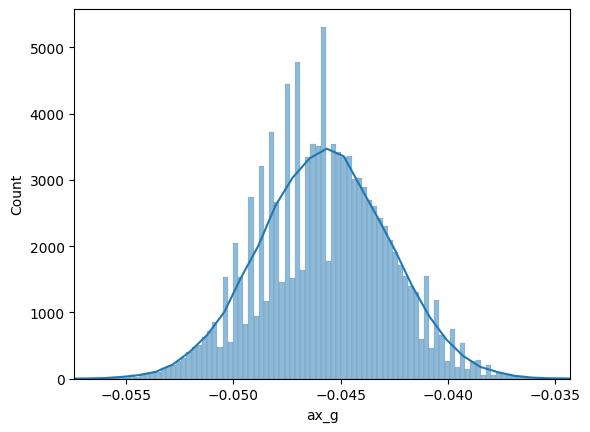

In [87]:

xmin = np.percentile(df_mpu6050["ax_g"], 0.01)
xmax = np.percentile(df_mpu6050["ax_g"], 99.99)

sns.histplot(data=df_mpu6050 , x="ax_g", kde=True)

plt.xlim(xmin, xmax)



(-0.0209, -0.0007)

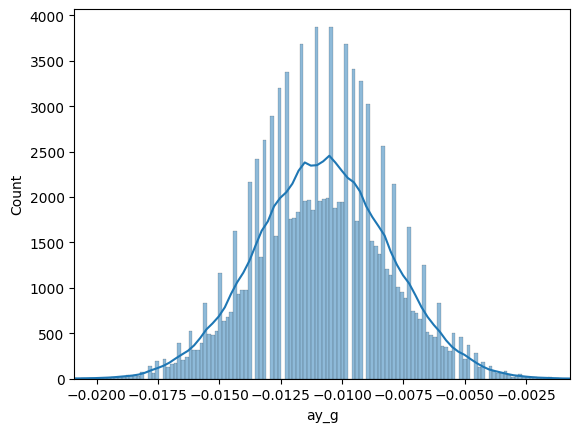

In [88]:
ymin = np.percentile(df_mpu6050["ay_g"], 0.01)
ymax = np.percentile(df_mpu6050["ay_g"], 99.99)

sns.histplot(data=df_mpu6050 , x="ay_g", kde=True)

plt.xlim(ymin, ymax)

(-0.06482060999999999, -0.0055074200000410035)

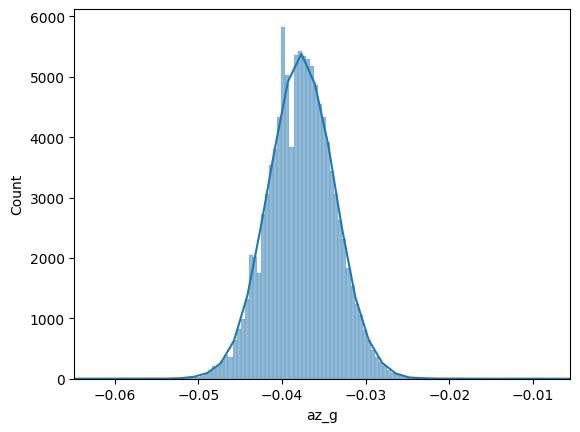

In [89]:
zmin = np.percentile(df_mpu6050["az_g"], 0.01)
zmax = np.percentile(df_mpu6050["az_g"], 99.99)

sns.histplot(data=df_mpu6050 , x="az_g", kde=True)

plt.xlim(zmin, zmax)

(-1.9466, -1.4809)

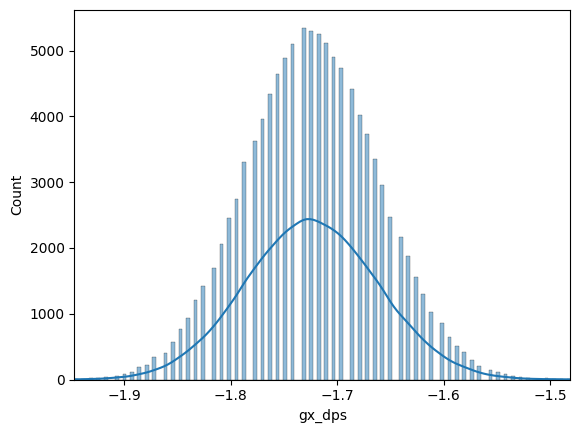

In [91]:
xmin = np.percentile(df_mpu6050["gx_dps"], 0.01)
xmax = np.percentile(df_mpu6050["gx_dps"], 99.99)

sns.histplot(data=df_mpu6050 , x="gx_dps", kde=True)

plt.xlim(xmin, xmax)

(-0.44168186, 0.6899275299994552)

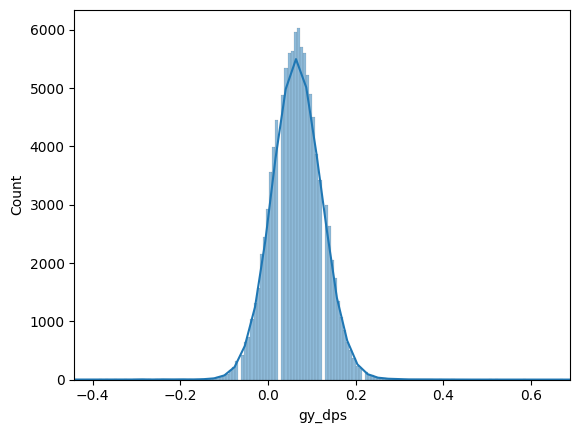

In [92]:
ymin = np.percentile(df_mpu6050["gy_dps"], 0.01)
ymax = np.percentile(df_mpu6050["gy_dps"], 99.99)

sns.histplot(data=df_mpu6050 , x="gy_dps", kde=True)

plt.xlim(ymin, ymax)

(-1.3893, -1.0076)

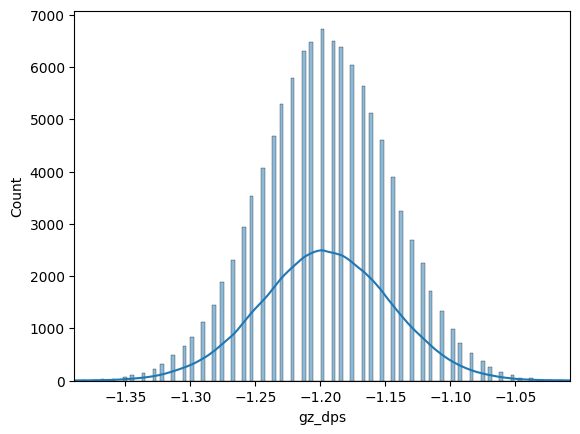

In [93]:
zmin = np.percentile(df_mpu6050["gz_dps"], 0.01)
zmax = np.percentile(df_mpu6050["gz_dps"], 99.99)

sns.histplot(data=df_mpu6050 , x="gz_dps", kde=True)

plt.xlim(zmin, zmax)